# Interpretation der HANA - SSBM Benchmark Log Datein

## Settings

Please adjust the following paths according to your environment.

In [1]:
from util import Analyser
LOG_PATH="../../../ssbm/log.log"
analyser = Analyser(LOG_PATH)

## Repetitions

In [2]:
print(analyser.get_repetitions())

100


## Row

In [3]:
benchmark = analyser.get_row_benchmark()
benchmark.print_stats()

Samples,100
Average,4761979
Min,4593863
Max,5039748
Median,4737774
Standard Deviation,105370
Total,476197852


In [4]:
from util import display_table

query_stats = benchmark.get_query_stats()
for stat in query_stats:
    display_table(stat.get_stats())

Samples,100
Average,151999
Min,142533
Max,202144
Median,149607
Standard Deviation,9359
Total,15199860


Samples,100
Average,180962
Min,176378
Max,212037
Median,179384
Standard Deviation,6291
Total,18096218


Samples,100
Average,148014
Min,138126
Max,176785
Median,146022
Standard Deviation,8537
Total,14801386


Samples,100
Average,189467
Min,176739
Max,226761
Median,187216
Standard Deviation,11475
Total,18946671


Samples,100
Average,293886
Min,278687
Max,375196
Median,287957
Standard Deviation,17417
Total,29388553


Samples,100
Average,120637
Min,110088
Max,212703
Median,118301
Standard Deviation,11599
Total,12063689


Samples,100
Average,165820
Min,157310
Max,218358
Median,162092
Standard Deviation,10093
Total,16581974


Samples,100
Average,135768
Min,126337
Max,164454
Median,133634
Standard Deviation,8515
Total,13576828


Samples,100
Average,111275
Min,103685
Max,150873
Median,108560
Standard Deviation,7800
Total,11127489


Samples,100
Average,194747
Min,188819
Max,242344
Median,192518
Standard Deviation,9192
Total,19474735


Samples,100
Average,703098
Min,680774
Max,795311
Median,698244
Standard Deviation,21967
Total,70309783


Samples,100
Average,653510
Min,617819
Max,760210
Median,643298
Standard Deviation,31450
Total,65350975


Samples,100
Average,254746
Min,241707
Max,300192
Median,249759
Standard Deviation,14084
Total,25474580


Samples,100
Average,554231
Min,540634
Max,656550
Median,550158
Standard Deviation,17357
Total,55423148


Samples,100
Average,177473
Min,173481
Max,208253
Median,176154
Standard Deviation,6258
Total,17747284


Samples,100
Average,480123
Min,450670
Max,563463
Median,475802
Standard Deviation,20828
Total,48012346


Samples,100
Average,246223
Min,234113
Max,320670
Median,241587
Standard Deviation,13295
Total,24622333


## Column

In [5]:
benchmark = analyser.get_column_benchmark()
benchmark.print_stats()

Samples,100
Average,876750
Min,846935
Max,1012946
Median,875501
Standard Deviation,20302
Total,87675040


In [6]:
from util import Comparison

column_benchmark = analyser.get_column_benchmark()
row_benchmark = analyser.get_row_benchmark()
comparison = Comparison(column_benchmark, row_benchmark)

comparison.print()

,Column Benchmark,Row Benchmark
Standard Deviation,20302,105370
Total,87675040,476197852
Max,1012946,5039748
Median,875501,4737774
Samples,100,100
Min,846935,4593863
Average,876750,4761979


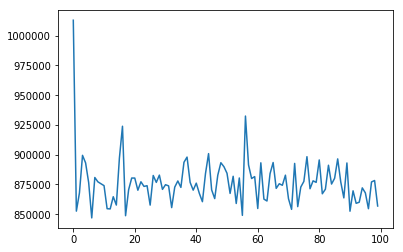

In [7]:
from matplotlib import pyplot as plt, mlab

benchmark = analyser.get_column_benchmark()
plt.plot(benchmark.get_times())
plt.show()

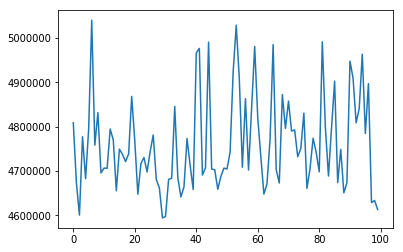

In [8]:
benchmark = analyser.get_row_benchmark()
plt.plot(benchmark.get_times())
plt.show()